In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [61]:
# please check my study's report to learn more about what I'm doing here. in fact, if you don't, this will hardly make any 
# sense. you can retrieve it from https://bit.ly/2m6vRE8

In [62]:
# we'll start by loading the rsf dataset

# unfortunarely, I had to get rid of the arabic and farsi characters first, otherwise pandas won't parse the file 
# I'm also specifying comma as a decimal separator as well as converting data from the 'Score 2019' column to float

url='C://Users//Leandro//Downloads//democracy_and_prosperity-master//democracy_and_prosperity-master//datasets//A.1.I_rsf_raw_dataset.csv'

df_rsf=pd.read_csv(url,decimal=',',dtype={'Score 2019':np.float})

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_rsf)

,ISO,Rank2019,FR_Country,EN_country,ES_country,Score A,Sco Exa,Score 2019,Progression RANK,Rank 2018,Score 2018,Zone
0,NOR,1,Norvège,Norway,Noruega,7.818673,0.000000,7.82,0,1,7.63,UE Balkans
1,FIN,2,Finlande,Finland,Finlandia,7.900014,0.000000,7.90,2,4,10.26,UE Balkans
2,SWE,3,Suede,Sweden,Suecia,8.309441,0.000000,8.31,-1,2,8.31,UE Balkans
3,NLD,4,Pays-Bas,Netherlands,Países Bajos,8.632713,0.000000,8.63,-1,3,10.01,UE Balkans
4,DNK,5,Danemark,Denmark,Dinamarca,9.867899,0.000000,9.87,4,9,13.99,UE Balkans
5,CHE,6,Suisse,Switzerland,Suiza,10.492952,6.931472,10.52,-1,5,11.27,UE Balkans
6,NZL,7,Nouvelle-Zélande,New Zealand,Nueva Zelanda,10.754698,0.000000,10.75,1,8,13.62,Asie-Pacifique
7,JAM,8,Jamaïque,Jamaica,Jamaica,11.125059,0.000000,11.13,-2,6,11.33,latam_carib
8,BEL,9,Belgique,Belgium,Bélgica,11.065209,16.094379,12.07,-2,7,13.16,UE Balkans
9,CRI,10,Costa Rica,Costa Rica,Costa Rica,12.243223,0.000000,12.24,0,10,14.01,latam_carib


In [63]:
# all I am interested in are country names and the latest (ie. 2019) score for each of them, which is why I'm' dropping all
# columns except those two

# on an afterthought though, I'll keep the 'zone' column, this will help handle missing values in what comes next

df_rsf=df_rsf[['EN_country','Score 2019','Zone']]

# I'll rename the remaining columns

df_rsf=df_rsf.rename(columns={'EN_country':'country_name','Score 2019':'rsf_index','Zone':'region'})

# using capitalised country names is nevertheless a bit clumsy, so I'm converting them to lower case. by the way I'm doing the
# same to zone names, all in one loop

for col in df_rsf.columns:
    if df_rsf[col].dtype=='object':
        df_rsf[col]=df_rsf[col].str.lower()

# plus I want rsf_index to go down, instead of up, from more freedom of speech to less, so I'm reckoning its reciprocal

df_rsf['rsf_index']=df_rsf['rsf_index']**(-1)
    
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_rsf)

,country_name,rsf_index,region
0,norway,0.127877,ue balkans
1,finland,0.126582,ue balkans
2,sweden,0.120337,ue balkans
3,netherlands,0.115875,ue balkans
4,denmark,0.101317,ue balkans
5,switzerland,0.095057,ue balkans
6,new zealand,0.093023,asie-pacifique
7,jamaica,0.089847,latam_carib
8,belgium,0.082850,ue balkans
9,costa rica,0.081699,latam_carib


In [64]:
# I'll now scale the data to some arbitrary range (my personal pick is 5-10) by using minmaxscaler

mms=MinMaxScaler(feature_range=(5,10))

df_rsf[['rsf_index']]=mms.fit_transform(df_rsf[['rsf_index']])

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_rsf)

,country_name,rsf_index,region
0,norway,10.000000,ue balkans
1,finland,9.944266,ue balkans
2,sweden,9.675472,ue balkans
3,netherlands,9.483427,ue balkans
4,denmark,8.856873,ue balkans
5,switzerland,8.587444,ue balkans
6,new zealand,8.499912,asie-pacifique
7,jamaica,8.363220,latam_carib
8,belgium,8.062065,ue balkans
9,costa rica,8.012540,latam_carib


In [65]:
# all that's left to do now is replace 'russian federation' with 'russia', so that we don't run into inconsistencies 
# later

df_rsf.replace(to_replace='russian federation',value='russia',inplace=True)

In [66]:
# I'm done with this dataset for now, let's move on to the next one

url='C://Users//Leandro//Downloads//democracy_and_prosperity-master//democracy_and_prosperity-master//datasets//A.1.II_pew_raw_dataset.csv'

df_pew=pd.read_csv(url)

df_pew

,country_name,policies,beliefs,protests_v,explicit,protests_e,destabilise,security
0,United States,95 4 1 100,77 20 3 100,44 51 5 100,52 43 5 100,86 11 3 100,81 15 4 100,35 59 6 100
1,Canada,93 5 2 100,64 29 7 100,29 64 7 100,37 53 10 100,89 8 3 100,81 14 5 100,37 56 7 100
2,France,89 11 0 100,53 46 0 100,32 67 1 100,41 59 0 100,78 22 0 100,77 23 0 100,46 54 0 100
3,Germany,93 5 1 100,38 58 4 100,11 88 2 100,23 74 3 100,87 12 1 100,72 25 3 100,48 47 4 100
4,Italy,88 10 3 100,29 65 6 100,30 64 6 100,36 57 8 100,87 11 2 100,74 23 4 100,58 36 6 100
5,Poland,89 8 4 100,40 51 9 100,60 29 12 100,50 35 14 100,90 8 2 100,78 14 7 100,76 18 6 100
6,Spain,96 3 1 100,54 42 4 100,32 65 3 100,70 26 4 100,95 4 1 100,83 16 1 100,60 37 4 100
7,United Kingdom,94 4 1 100,57 36 7 100,22 72 6 100,31 61 8 100,84 11 4 100,78 17 5 100,29 66 5 100
8,Russia,72 24 3 100,22 69 9 100,17 77 6 100,16 76 8 100,67 27 6 100,53 39 8 100,39 50 11 100
9,Ukraine,87 8 5 100,12 79 9 100,8 81 11 100,8 82 10 100,82 12 6 100,39 49 13 100,18 73 9 100


In [67]:
# because of the way I've pulled the data from the original source (which was a PDF file) all numeric columns are
# overfilled, so I need to clean them
# only the first two digits in each cell matter, and the resulting data type should be float


for col in df_pew.columns[1:]:
    df_pew[col]=df_pew[col].str[:2]
    df_pew=df_pew.astype({col: 'float'})

df_pew

,country_name,policies,beliefs,protests_v,explicit,protests_e,destabilise,security
0,United States,95.0,77.0,44.0,52.0,86.0,81.0,35.0
1,Canada,93.0,64.0,29.0,37.0,89.0,81.0,37.0
2,France,89.0,53.0,32.0,41.0,78.0,77.0,46.0
3,Germany,93.0,38.0,11.0,23.0,87.0,72.0,48.0
4,Italy,88.0,29.0,30.0,36.0,87.0,74.0,58.0
5,Poland,89.0,40.0,60.0,50.0,90.0,78.0,76.0
6,Spain,96.0,54.0,32.0,70.0,95.0,83.0,60.0
7,United Kingdom,94.0,57.0,22.0,31.0,84.0,78.0,29.0
8,Russia,72.0,22.0,17.0,16.0,67.0,53.0,39.0
9,Ukraine,87.0,12.0,8.0,8.0,82.0,39.0,18.0


In [68]:
# I now have to deal with the NaN at line 19. taking into account what pew say in their methodology and analysis,
# I believe the best solution is to impute it with that column's lowest value

df_pew['explicit'].fillna(df_pew['explicit'].min(),inplace=True)

df_pew

,country_name,policies,beliefs,protests_v,explicit,protests_e,destabilise,security
0,United States,95.0,77.0,44.0,52.0,86.0,81.0,35.0
1,Canada,93.0,64.0,29.0,37.0,89.0,81.0,37.0
2,France,89.0,53.0,32.0,41.0,78.0,77.0,46.0
3,Germany,93.0,38.0,11.0,23.0,87.0,72.0,48.0
4,Italy,88.0,29.0,30.0,36.0,87.0,74.0,58.0
5,Poland,89.0,40.0,60.0,50.0,90.0,78.0,76.0
6,Spain,96.0,54.0,32.0,70.0,95.0,83.0,60.0
7,United Kingdom,94.0,57.0,22.0,31.0,84.0,78.0,29.0
8,Russia,72.0,22.0,17.0,16.0,67.0,53.0,39.0
9,Ukraine,87.0,12.0,8.0,8.0,82.0,39.0,18.0


In [69]:
# it so happens that I have no interest in so many columns, I want just the one. so I'm reckoning the overall geometric mean 
# (as in the present situation, factors contribute towards a final result) and contracting columns so as to end up with the
# essential information only

# additionally, I'm converting country names to lower case

df_pew['pew_index']=(df_pew['policies']*df_pew['beliefs']*df_pew['protests_v']*df_pew['explicit']*df_pew['protests_e']*df_pew['destabilise']*df_pew['security'])**(1/7)

df_pew['country_name']=df_pew['country_name'].str.lower()

df_pew=df_pew[['country_name','pew_index']]

# I would also like to scale the data and order the rows by score from highest to lowest so I can get a decent look at the
# dataframe

df_pew[['pew_index']]=mms.fit_transform(df_pew[['pew_index']])

df_pew.sort_values('pew_index',ascending=False,inplace=True)

df_pew=df_pew.reset_index(drop=True)

df_pew

,country_name,pew_index
0,poland,10.000000
1,spain,9.962873
2,united states,9.667586
3,mexico,9.373024
4,venezuela,9.371052
5,philippines,8.875672
6,france,8.872443
7,canada,8.869274
8,australia,8.702439
9,peru,8.577654


In [70]:
# there it is. now I need to assign each country its geographical region so I can successfully merge this dataframe with the  
# rsf one and optimise the treatment of missing values. I will go on and create a new dataframe already, for this will
# make things easier

df_rsf_pew=pd.merge(df_rsf,df_pew,how='left',on='country_name',sort=True)

df_rsf_pew=df_rsf_pew[['country_name','region','rsf_index','pew_index']]

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_rsf_pew)

,country_name,region,rsf_index,pew_index
0,afghanistan,asie-pacifique,5.673807,NaN
1,albania,ue balkans,5.938597,NaN
2,algeria,mena,5.437012,NaN
3,andorra,ue balkans,6.243694,NaN
4,angola,afrique,5.727363,NaN
5,argentina,latam_carib,6.017084,8.369537
6,armenia,eeac,5.981399,NaN
7,australia,asie-pacifique,7.096821,8.702439
8,austria,ue balkans,7.303780,NaN
9,azerbaijan,eeac,5.224138,NaN


In [71]:
# now I'm not sure all these region names are easy to deal with, so I'm renaming them to current usage (in english)

df_rsf_pew['region']=df_rsf_pew['region'].map({'afrique':'africa','asie-pacifique':'asia_pacific','eeac':'east_asia','mena':'middle_east','ue balkans':'europe','north_am':'north_am','latam_carib':'latam_carib'})

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_rsf_pew)

,country_name,region,rsf_index,pew_index
0,afghanistan,asia_pacific,5.673807,NaN
1,albania,europe,5.938597,NaN
2,algeria,middle_east,5.437012,NaN
3,andorra,europe,6.243694,NaN
4,angola,africa,5.727363,NaN
5,argentina,latam_carib,6.017084,8.369537
6,armenia,east_asia,5.981399,NaN
7,australia,asia_pacific,7.096821,8.702439
8,austria,europe,7.303780,NaN
9,azerbaijan,east_asia,5.224138,NaN


In [72]:
# I am now left with a lot of missing values to handle. fortunately, I already had countries sorted out by region so  
# I can now impute to each country marked with a NaN in pew_index the region average for that index

africa_average=np.mean(df_rsf_pew['pew_index'][df_rsf_pew['region']=='africa'])
asia_pacific_average=np.mean(df_rsf_pew['pew_index'][df_rsf_pew['region']=='asia_pacific'])
east_asia_average=np.mean(df_rsf_pew['pew_index'][df_rsf_pew['region']=='east_asia'])
europe_average=np.mean(df_rsf_pew['pew_index'][df_rsf_pew['region']=='europe'])
latam_carib_average=np.mean(df_rsf_pew['pew_index'][df_rsf_pew['region']=='latam_carib'])
middle_east_average=np.mean(df_rsf_pew['pew_index'][df_rsf_pew['region']=='middle_east'])

a=(f'africa_average={africa_average}; '
f'asia_pacific_average={asia_pacific_average}; '
f'east_asia_average={east_asia_average}; '
f'europe_average={europe_average}; '
f'latam_carib_average={latam_carib_average}; '
f'middle_east_average={middle_east_average}; ')

print(a)

africa_average=7.01920957690561; asia_pacific_average=6.990626482385334; east_asia_average=6.036662643101201; europe_average=8.818448934947883; latam_carib_average=8.66303585291378; middle_east_average=6.091236726619532; 


In [73]:
# all averages have been calculated in the latter line, so now it's just a matter of imputing them into the main dataframe

for i in range(180):
    if (df_rsf_pew['region'][i]=='africa' and np.isnan(df_rsf_pew['pew_index'][i])==True):
        df_rsf_pew['pew_index'][i]=africa_average
    if (df_rsf_pew['region'][i]=='asia_pacific' and np.isnan(df_rsf_pew['pew_index'][i])==True):
        df_rsf_pew['pew_index'][i]=asia_pacific_average
    if (df_rsf_pew['region'][i]=='east_asia' and np.isnan(df_rsf_pew['pew_index'][i])==True):
        df_rsf_pew['pew_index'][i]=east_asia_average
    if (df_rsf_pew['region'][i]=='europe' and np.isnan(df_rsf_pew['pew_index'][i])==True):
        df_rsf_pew['pew_index'][i]=europe_average
    if (df_rsf_pew['region'][i]=='latam_carib' and np.isnan(df_rsf_pew['pew_index'][i])==True):
        df_rsf_pew['pew_index'][i]=latam_carib_average
    if (df_rsf_pew['region'][i]=='middle_east' and np.isnan(df_rsf_pew['pew_index'][i])==True):
        df_rsf_pew['pew_index'][i]=middle_east_average
        
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_rsf_pew)

,country_name,region,rsf_index,pew_index
0,afghanistan,asia_pacific,5.673807,6.990626
1,albania,europe,5.938597,8.818449
2,algeria,middle_east,5.437012,6.091237
3,andorra,europe,6.243694,8.818449
4,angola,africa,5.727363,7.019210
5,argentina,latam_carib,6.017084,8.369537
6,armenia,east_asia,5.981399,6.036663
7,australia,asia_pacific,7.096821,8.702439
8,austria,europe,7.303780,8.818449
9,azerbaijan,east_asia,5.224138,6.036663


In [74]:
# now it's time to face the truth. I've picked both these indices (rsf and pew) in the hope that each tell a different
# story, ie. that they are not significantly correlated, otherwise I'd would be inflating the sample's variance. let's see if
# data science proves me wrong

# I'm using spearman because it's more appropriate for rank-based comparisons

df_rsf_pew.corr(method='spearman')

,rsf_index,pew_index
rsf_index,1.000000,0.538632
pew_index,0.538632,1.000000


In [75]:
# these variables aren't uncorrelated, and maybe in a different context one of them could be dropped, but it's still nothing
# scary for the purposes of our study. they still tell a slightly different story each. therefore, I will keep both onboard for
# the time being

# I'm now moving on to a different kind of information, viz. that on social mobility but remember, I'm still working on
# the democracy side 

url='C://Users//Leandro//Downloads//democracy_and_prosperity-master//democracy_and_prosperity-master//datasets//A.2.I_oecd_migration_raw_dataset.csv'

df_oecd_migration_1=pd.read_csv(url)

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_oecd_migration_1)

,country_name,percentage,% of total population
0,Australia,7 342.7,29.6
1,% of total population,29.6,1 697.1
2,Austria,1 697.1,19.4
3,% of total population,19.4,1 932.8
4,Belgium,1 932.8,16.8
5,% of total population,16.8,..
6,Canada,..,..
7,% of total population,..,..
8,Chile,..,..
9,% of total population,..,..


In [76]:
# I've tried to make the above more usable with the spreadsheet editor, but it still looks terrible. I only need every other
# row as well as the third column's values, so here's what I'll do

df_oecd_migration=df_oecd_migration_1.copy()

x=np.arange(0,74)
y=np.arange(0,74,2)

for i,j in zip(x,y):
    for col in df_oecd_migration_1.columns:
        df_oecd_migration[col][i]=df_oecd_migration_1[col][j]

df_oecd_migration=df_oecd_migration.drop(df_oecd_migration.index[[range(37,74)]])

del df_oecd_migration['percentage']

df_oecd_migration=df_oecd_migration.rename(columns={'% of total population':'percentage'})        

df_oecd_migration

,country_name,percentage
0,Australia,29.6
1,Austria,19.4
2,Belgium,16.8
3,Canada,..
4,Chile,..
5,Czech Republic,..
6,Denmark,10.3
7,Estonia,15.0
8,Finland,6.7
9,France,12.5


In [77]:
# looks pretty clean right now. we still have a few missing values, though. now, there's no point averaging them out here,
# let me worry about that later. we can simply drop those rows

df_oecd_migration=df_oecd_migration.drop(df_oecd_migration[df_oecd_migration['percentage']=='..'].index,axis=0)

df_oecd_migration=df_oecd_migration.reset_index(drop=True)
        
df_oecd_migration

,country_name,percentage
0,Australia,29.6
1,Austria,19.4
2,Belgium,16.8
3,Denmark,10.3
4,Estonia,15.0
5,Finland,6.7
6,France,12.5
7,Germany,16.0
8,Greece,5.6
9,Hungary,5.5


In [78]:
# there you go. now let's move on to the next dataset

url='C://Users//Leandro//Downloads//democracy_and_prosperity-master//democracy_and_prosperity-master//datasets//A.2.II_oecd_generations_raw_dataset.csv'

df_oecd_generations=pd.read_csv(url,dtype={'generations':np.float})

df_oecd_generations

,country_name,generations
0,denmark,2.0
1,norway,3.0
2,finland,3.0
3,sweden,3.0
4,spain,4.0
5,new zealand,4.0
6,canada,4.0
7,greece,4.0
8,belgium,4.0
9,australia,4.0


In [79]:
# there are no major issues here since I had to type this one from scratch. next one on the list is the world bank's ease of
# doing business score

url='C://Users//Leandro//Downloads//democracy_and_prosperity-master//democracy_and_prosperity-master//datasets//A.2.III_ease_db_world_bank_raw_dataset.csv'

df_wb_ease=pd.read_csv(url)

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_wb_ease)

,country_name,ease_db
0,Afghanistan,47.77
1,Albania,69.51
2,Algeria,49.65
3,Angola,43.86
4,Antigua and Barbuda,59.48
5,Argentina,58.80
6,Armenia,75.37
7,Australia,80.13
8,Austria,78.57
9,Azerbaijan,78.64


In [80]:
# I'm converting country names to lower case

df_oecd_migration=df_oecd_migration.reset_index(drop=True)

df_oecd_migration['country_name']=df_oecd_migration['country_name'].str.lower()
    
df_wb_ease['country_name']=df_wb_ease['country_name'].str.lower()
    
# next thing I''m doing is, I'm sorting these dataframes' rows in ascending order then scaling them

# let's see: a high percentage of migrants is good, a great ease of doing business is also good. so I just have to apply
# inverse to the df_oecd_generations dataframe's 'generations' colum

df_oecd_generations['generations']=df_oecd_generations['generations']**(-1)
    
df_oecd_migration[['percentage']]=mms.fit_transform(df_oecd_migration[['percentage']])
df_oecd_generations[['generations']]=mms.fit_transform(df_oecd_generations[['generations']])
df_wb_ease[['ease_db']]=mms.fit_transform(df_wb_ease[['ease_db']])

df_oecd_migration=df_oecd_migration.rename(columns={'percentage':'oecd_mig_index'})
df_oecd_generations=df_oecd_generations.rename(columns={'generations':'oecd_gen_index'})
df_wb_ease=df_wb_ease.rename(columns={'ease_db':'wb_index'})

In [81]:
# we'll now do pretty much the same as we did before, by merging data and treating missing values. by performing an 
# outer merge, we'll preserve all countries from all datasets and therefore, avoid losing information

df_democracy=pd.merge(df_wb_ease,df_rsf_pew,how='outer',on='country_name',sort=True)
df_democracy=pd.merge(df_democracy,df_oecd_migration,how='outer',on='country_name',sort=True)
df_democracy=pd.merge(df_democracy,df_oecd_generations,how='outer',on='country_name',sort=True)

df_democracy=df_democracy[['country_name','region','rsf_index','pew_index','oecd_mig_index','oecd_gen_index','wb_index']]

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_democracy)

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
0,afghanistan,asia_pacific,5.673807,6.990626,NaN,NaN,7.083396
1,albania,europe,5.938597,8.818449,NaN,NaN,8.716754
2,algeria,middle_east,5.437012,6.091237,NaN,NaN,7.224643
3,andorra,europe,6.243694,8.818449,NaN,NaN,NaN
4,angola,africa,5.727363,7.019210,NaN,NaN,6.789632
5,antigua and barbuda,NaN,NaN,NaN,NaN,NaN,7.963186
6,argentina,latam_carib,6.017084,8.369537,NaN,5.925926,7.912096
7,armenia,east_asia,5.981399,6.036663,NaN,NaN,9.157025
8,australia,asia_pacific,7.096821,8.702439,8.03493,6.944444,9.514651
9,austria,europe,7.303780,8.818449,6.9214,6.333333,9.397446


In [82]:
# it's never too late to search for inconsistencies

isna_rsf=df_democracy['rsf_index'].isnull()==True

isna_wb=df_democracy['wb_index'].isnull()==True

df_democracy[isna_rsf]

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
5,antigua and barbuda,NaN,NaN,NaN,NaN,NaN,7.963186
11,bahamas,NaN,NaN,NaN,NaN,NaN,7.919609
14,barbados,NaN,NaN,NaN,NaN,NaN,7.760331
46,dominica,NaN,NaN,NaN,NaN,NaN,8.082645
67,grenada,NaN,NaN,NaN,NaN,NaN,7.454545
90,kiribati,NaN,NaN,NaN,NaN,NaN,7.181067
109,marshall islands,NaN,NaN,NaN,NaN,NaN,7.372652
113,micronesia,NaN,NaN,NaN,NaN,NaN,7.175056
133,palau,NaN,NaN,NaN,NaN,NaN,7.670924
141,puerto rico (u.s.),NaN,NaN,NaN,NaN,NaN,8.712998


In [83]:
df_democracy[isna_wb]

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
3,andorra,europe,6.243694,8.818449,NaN,NaN,NaN
41,cuba,latam_carib,5.170754,8.663036,NaN,NaN,NaN
48,dpr korea,asia_pacific,5.012322,6.990626,NaN,NaN,NaN
100,liechtenstein,europe,6.596762,8.818449,NaN,NaN,NaN
127,north cyprus,europe,5.946861,8.818449,NaN,NaN,NaN
130,oecs,latam_carib,6.149076,8.663036,NaN,NaN,NaN
182,turkmenistan,east_asia,5.000000,6.036663,NaN,NaN,NaN


In [84]:
# we seem to be quite alright, except for the oecs which is not really a country, which is why I'm dropping it

df_democracy=df_democracy.drop(130).reset_index(drop=True)

In [85]:
# we still have a lot of missing values left to work on though

df_democracy.isnull().values.ravel().sum()

392

In [86]:
# number of rows with at least one missing value

df_democracy.isnull().any(axis=1).sum()

178

In [87]:
# first, let's worry about the regions column

isna_region=df_democracy['region'].isnull()==True

df_democracy[isna_region]

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
5,antigua and barbuda,NaN,NaN,NaN,NaN,NaN,7.963186
11,bahamas,NaN,NaN,NaN,NaN,NaN,7.919609
14,barbados,NaN,NaN,NaN,NaN,NaN,7.760331
46,dominica,NaN,NaN,NaN,NaN,NaN,8.082645
67,grenada,NaN,NaN,NaN,NaN,NaN,7.454545
90,kiribati,NaN,NaN,NaN,NaN,NaN,7.181067
109,marshall islands,NaN,NaN,NaN,NaN,NaN,7.372652
113,micronesia,NaN,NaN,NaN,NaN,NaN,7.175056
132,palau,NaN,NaN,NaN,NaN,NaN,7.670924
140,puerto rico (u.s.),NaN,NaN,NaN,NaN,NaN,8.712998


In [88]:
# there seem to be no major issues. I'll just jump in and set the region manually

df_democracy.at[5,'region']='latam_carib'
df_democracy.at[11,'region']='latam_carib'
df_democracy.at[14,'region']='latam_carib'
df_democracy.at[46,'region']='latam_carib'
df_democracy.at[67,'region']='asia_pacific'
df_democracy.at[90,'region']='asia_pacific'
df_democracy.at[109,'region']='asia_pacific'
df_democracy.at[113,'region']='asia_pacific'
df_democracy.at[132,'region']='asia_pacific'
df_democracy.at[140,'region']='north_am'
df_democracy.at[146,'region']='europe'
df_democracy.at[155,'region']='asia_pacific'
df_democracy.at[162,'region']='latam_carib'
df_democracy.at[163,'region']='latam_carib'
df_democracy.at[164,'region']='latam_carib'
df_democracy.at[170,'region']='latam_carib'
df_democracy.at[189,'region']='asia_pacific'

In [89]:
# it shouldn't be a problem now to fill in missing values with regional averages. I'll do it one index at a time
# (ie. one index per cell), with the exception of the oecd_mig_index for reasons I'll explain soon

africa_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='africa'])
asia_pacific_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='asia_pacific'])
east_asia_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='east_asia'])
europe_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='europe'])
latam_carib_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='latam_carib'])
middle_east_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='middle_east'])
north_am_average_rsf=np.mean(df_democracy['rsf_index'][df_democracy['region']=='north_am'])

for i in range(196):
    if (df_democracy['region'][i]=='africa' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=africa_average_rsf
    if (df_democracy['region'][i]=='asia_pacific' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=asia_pacific_average_rsf
    if (df_democracy['region'][i]=='east_asia' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=east_asia_average_rsf
    if (df_democracy['region'][i]=='europe' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=europe_average_rsf
    if (df_democracy['region'][i]=='latam_carib' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=latam_carib_average_rsf
    if (df_democracy['region'][i]=='middle_east' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=middle_east_average_rsf
    if (df_democracy['region'][i]=='north_am' and np.isnan(df_democracy['rsf_index'][i])==True):
        df_democracy['rsf_index'][i]=north_am_average_rsf

In [90]:
africa_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='africa'])
asia_pacific_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='asia_pacific'])
east_asia_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='east_asia'])
europe_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='europe'])
latam_carib_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='latam_carib'])
middle_east_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='middle_east'])
north_am_average_pew=np.mean(df_democracy['pew_index'][df_democracy['region']=='north_am'])

for i in range(196):
    if (df_democracy['region'][i]=='africa' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=africa_average_pew
    if (df_democracy['region'][i]=='asia_pacific' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=asia_pacific_average_pew
    if (df_democracy['region'][i]=='east_asia' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=east_asia_average_pew
    if (df_democracy['region'][i]=='europe' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=europe_average_pew
    if (df_democracy['region'][i]=='latam_carib' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=latam_carib_average_pew
    if (df_democracy['region'][i]=='middle_east' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=middle_east_average_pew
    if (df_democracy['region'][i]=='north_am' and np.isnan(df_democracy['pew_index'][i])==True):
        df_democracy['pew_index'][i]=north_am_average_pew

In [91]:
africa_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='africa'])
asia_pacific_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='asia_pacific'])
east_asia_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='east_asia'])
europe_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='europe'])
latam_carib_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='latam_carib'])
middle_east_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='middle_east'])
north_am_average_gen=np.mean(df_democracy['oecd_gen_index'][df_democracy['region']=='north_am'])

for i in range(196):
    if (df_democracy['region'][i]=='africa' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=africa_average_gen
    if (df_democracy['region'][i]=='asia_pacific' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=asia_pacific_average_gen
    if (df_democracy['region'][i]=='east_asia' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=east_asia_average_gen
    if (df_democracy['region'][i]=='europe' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=europe_average_gen
    if (df_democracy['region'][i]=='latam_carib' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=latam_carib_average_gen
    if (df_democracy['region'][i]=='middle_east' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=middle_east_average_gen
    if (df_democracy['region'][i]=='north_am' and np.isnan(df_democracy['oecd_gen_index'][i])==True):
        df_democracy['oecd_gen_index'][i]=north_am_average_gen

In [92]:
africa_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='africa'])
asia_pacific_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='asia_pacific'])
east_asia_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='east_asia'])
europe_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='europe'])
latam_carib_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='latam_carib'])
middle_east_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='middle_east'])
north_am_average_wb=np.mean(df_democracy['wb_index'][df_democracy['region']=='north_am'])

for i in range(196):
    if (df_democracy['region'][i]=='africa' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=africa_average_wb
    if (df_democracy['region'][i]=='asia_pacific' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=asia_pacific_average_wb
    if (df_democracy['region'][i]=='east_asia' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=east_asia_average_wb
    if (df_democracy['region'][i]=='europe' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=europe_average_wb
    if (df_democracy['region'][i]=='latam_carib' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=latam_carib_average_wb
    if (df_democracy['region'][i]=='middle_east' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=middle_east_average_wb
    if (df_democracy['region'][i]=='north_am' and np.isnan(df_democracy['wb_index'][i])==True):
        df_democracy['wb_index'][i]=north_am_average_wb
        
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_democracy)

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
0,afghanistan,asia_pacific,5.673807,6.990626,NaN,6.406085,7.083396
1,albania,europe,5.938597,8.818449,NaN,6.891379,8.716754
2,algeria,middle_east,5.437012,6.091237,NaN,NaN,7.224643
3,andorra,europe,6.243694,8.818449,NaN,6.891379,9.155997
4,angola,africa,5.727363,7.019210,NaN,5.246914,6.789632
5,antigua and barbuda,latam_carib,6.101453,8.663036,NaN,5.524691,7.963186
6,argentina,latam_carib,6.017084,8.369537,NaN,5.925926,7.912096
7,armenia,east_asia,5.981399,6.036663,NaN,NaN,9.157025
8,australia,asia_pacific,7.096821,8.702439,8.03493,6.944444,9.514651
9,austria,europe,7.303780,8.818449,6.9214,6.333333,9.397446


In [93]:
# as to the oecd_mig_index: apparently, none of the countries with missing values seem to be particularly sought
# after by international migrants, which is probably why they were not surveyed by the oecd. it is therefore appropriate to 
# impute a value of 5 to each of them (remember, we are working on a normalised 5-10 scale)

df_democracy['oecd_mig_index'][df_democracy['oecd_mig_index'].isnull()]=5
     
df_democracy['oecd_mig_index']=pd.to_numeric(df_democracy['oecd_mig_index'])
        
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_democracy)

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
0,afghanistan,asia_pacific,5.673807,6.990626,5.000000,6.406085,7.083396
1,albania,europe,5.938597,8.818449,5.000000,6.891379,8.716754
2,algeria,middle_east,5.437012,6.091237,5.000000,NaN,7.224643
3,andorra,europe,6.243694,8.818449,5.000000,6.891379,9.155997
4,angola,africa,5.727363,7.019210,5.000000,5.246914,6.789632
5,antigua and barbuda,latam_carib,6.101453,8.663036,5.000000,5.524691,7.963186
6,argentina,latam_carib,6.017084,8.369537,5.000000,5.925926,7.912096
7,armenia,east_asia,5.981399,6.036663,5.000000,NaN,9.157025
8,australia,asia_pacific,7.096821,8.702439,8.034934,6.944444,9.514651
9,austria,europe,7.303780,8.818449,6.921397,6.333333,9.397446


In [94]:
# as to the oecd_gen_index: there are no averages for either east_asia or middle_east countries. by peeking into these
# countries' gini coefficients, it appears that we're rather safe imputing them the asia_pacific average 

df_democracy['oecd_gen_index'][df_democracy['oecd_gen_index'].isnull()]=asia_pacific_average_gen 

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_democracy)

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
0,afghanistan,asia_pacific,5.673807,6.990626,5.000000,6.406085,7.083396
1,albania,europe,5.938597,8.818449,5.000000,6.891379,8.716754
2,algeria,middle_east,5.437012,6.091237,5.000000,6.406085,7.224643
3,andorra,europe,6.243694,8.818449,5.000000,6.891379,9.155997
4,angola,africa,5.727363,7.019210,5.000000,5.246914,6.789632
5,antigua and barbuda,latam_carib,6.101453,8.663036,5.000000,5.524691,7.963186
6,argentina,latam_carib,6.017084,8.369537,5.000000,5.925926,7.912096
7,armenia,east_asia,5.981399,6.036663,5.000000,6.406085,9.157025
8,australia,asia_pacific,7.096821,8.702439,8.034934,6.944444,9.514651
9,austria,europe,7.303780,8.818449,6.921397,6.333333,9.397446


In [95]:
# before we move on to the next step, I seem to recall that some countries from the df_oecd_migration dataset had no data
# associated with them. this doesn't necessarily mean that they are not sought after by international migrants. it's hard to
# infer the data, though, from other datasets, even from the same survey, but it certainly possible to infer which
# ones are, and which are not, sought after by international migrants and/or asylum seekers based on the respective inflows.
# so I'll go ahead and attribute these countries mean overall, instead of minimum, value to avoid their getting penalised

oecd_mig_average=np.mean(df_democracy['oecd_mig_index'])

l_countries=['canada','czech republic','ireland','israel','japan','south korea','mexico','new zealand','russia']

for c in l_countries:
    df_democracy['oecd_mig_index'][df_democracy['country_name']==c]=oecd_mig_average

df_democracy[df_democracy['oecd_mig_index']==oecd_mig_average]

,country_name,region,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
31,canada,north_am,7.239362,8.869274,5.185868,6.944444,9.449286
43,czech republic,europe,6.225441,8.818449,5.185868,6.891379,9.211871
81,ireland,europe,7.365545,8.818449,5.185868,6.333333,9.422990
82,israel,middle_east,5.893641,7.198349,5.185868,6.406085,8.996243
86,japan,asia_pacific,5.962177,6.072138,5.185868,6.944444,9.178062
112,mexico,latam_carib,5.416298,9.373024,5.185868,5.524691,8.910594
123,new zealand,asia_pacific,8.499912,6.990626,5.185868,6.944444,10.000000
143,russia,east_asia,5.351744,6.584065,5.185868,6.406085,9.307288
158,south korea,asia_pacific,6.221974,7.324525,5.185868,6.333333,9.815928


In [96]:
# right now we're getting a bit more scientific. let's compare the above variables' variance to see if there's some one we 
# can drop

l_labels=['rsf_index','pew_index','oecd_mig_index','oecd_gen_index','wb_index']

l_variances=[]

for var in l_labels:
    l_variances.append(round(df_democracy[var].var(),2))
    print(f'{var}: {round(df_democracy[var].var(),2)}')

rsf_index: 0.77
pew_index: 1.25
oecd_mig_index: 0.36
oecd_gen_index: 0.51
wb_index: 1.0


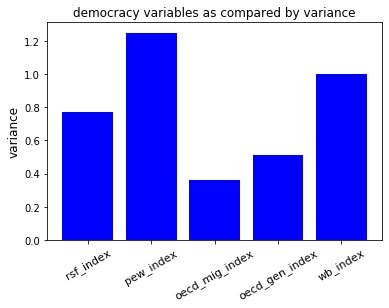

In [97]:
# or graphically

def bar_plot_var_1():
    index=np.arange(len(l_labels))
    plt.bar(index,l_variances,color=('b'))
    plt.ylabel('variance',fontsize=12)
    plt.xticks(index,l_labels,fontsize=11,rotation=30)
    plt.title('democracy variables as compared by variance',fontsize=12)
    plt.show()

bar_plot_var_1()

In [98]:
# let's take a look at how they correlate with one another

df_democracy.corr(method='spearman')

,rsf_index,pew_index,oecd_mig_index,oecd_gen_index,wb_index
rsf_index,1.000000,0.553664,0.494144,0.214024,0.405344
pew_index,0.553664,1.000000,0.436521,0.110320,0.269488
oecd_mig_index,0.494144,0.436521,1.000000,0.398612,0.558532
oecd_gen_index,0.214024,0.110320,0.398612,1.000000,0.563592
wb_index,0.405344,0.269488,0.558532,0.563592,1.000000


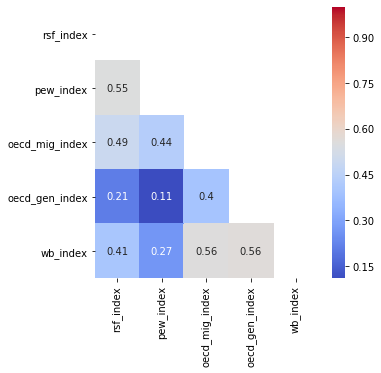

In [99]:
# or graphically

def heat_plot_var(df):
    fig,ax=plt.subplots(figsize=(5,5))
    mask=np.zeros_like(df.corr(method='spearman').abs())
    mask[np.triu_indices_from(mask)]=1
    sns.heatmap(df.corr(method='spearman').abs(),mask= mask,ax=ax,cmap='coolwarm',annot=True)
    
heat_plot_var(df_democracy)

In [100]:
# by looking at the above graphs, I don't like the way pew_index shows a lot of variance and rather minor covariance, 
# since it was built on regional averages, so it's not supposed to be a quality index. besides that, the oecd_mig_index has
# rather poor relative variance. also, I'm now afraid the oecd_gen_index does not really tell a different story than the 
# wb_index and if that checks out, we would be inflating variance and reinforcing trends, which is obviously against good
# practice. therefore, I am dropping these indices, based on a more informed analysis which I'm now able to perform

# for the purposes of the machine learning algorithm I'll have to calculate a democratic index as a combination  
# of its parts. for the lack of a solid basis to attribute weights, this calculation is going to be a simple
# geometric mean. I'm using the geometric mean because in the present situation, factors contribute towards a final result

# before we proceed, I have decided to recast the wb_index as its natural logarithm, as it is more likely than not,
# in my opinion, that the ease of doing business makes a lot of difference at the bottom yet has only marginal utility 
# at the top. this may not make a great difference but still makes sense to me

mms_wb=MinMaxScaler(feature_range=(1,np.exp(1)))

df_democracy[['wb_index']]=mms_wb.fit_transform(df_democracy[['wb_index']])

df_democracy['wb_index']=np.log(df_democracy['wb_index'])
    
df_democracy[['wb_index']]=mms.fit_transform(df_democracy[['wb_index']])

df_democracy['democracy_index']=((df_democracy['rsf_index'])*(df_democracy['wb_index']))**(1/2)
    
df_democracy[['democracy_index']]=mms.fit_transform(df_democracy[['democracy_index']])
    
df_democracy=df_democracy.drop(columns=['pew_index','oecd_mig_index','oecd_gen_index'],axis=1)

df_democracy['country_name']=df_democracy['country_name'].str.rstrip()

df_democracy.sort_values('country_name',inplace=True)

df_democracy=df_democracy.reset_index(drop=True)

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_democracy)

,country_name,region,rsf_index,wb_index,democracy_index
0,afghanistan,asia_pacific,5.673807,7.699899,6.552588
1,albania,europe,5.938597,9.114923,7.333146
2,algeria,middle_east,5.437012,7.839373,6.467958
3,andorra,europe,6.243694,9.435823,7.665437
4,angola,africa,5.727363,7.396732,6.447217
5,antigua and barbuda,latam_carib,6.101453,8.511321,7.175544
6,argentina,latam_carib,6.017084,8.467637,7.104147
7,armenia,east_asia,5.981399,9.436550,7.495608
8,australia,asia_pacific,7.096821,9.683384,8.306749
9,austria,europe,7.303780,9.603824,8.395896


In [101]:
# there is still one thing left to do before we move on to the prosperity prong, which is to study both the variance, and
# therefore relevance, of the democracy_index variable as well as its covariance with the previous indices

l_labels=['rsf_index','wb_index','democracy_index']

l_variances=[]

for var in l_labels:
    print(f'{var}: {round(df_democracy[var].var(),2)}')
    l_variances.append(round(df_democracy[var].var(),2))

rsf_index: 0.77
wb_index: 0.78
democracy_index: 0.6


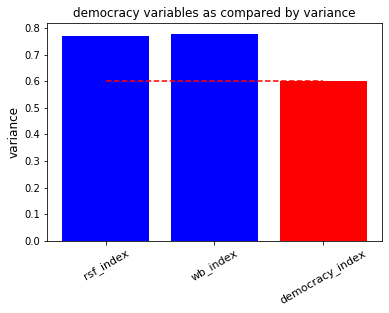

In [102]:
# or graphically

def bar_plot_var_2():
    index=np.arange(len(l_labels))
    plt.bar(index,l_variances,color=['b','b','r'])
    plt.ylabel('variance',fontsize=12)
    plt.xticks(index,l_labels,fontsize=11,rotation=30)
    plt.title('democracy variables as compared by variance',fontsize=12)
    plt.hlines(round(df_democracy['democracy_index'].var(),2),0,len(l_labels)-1,linestyle='dashed',color='red')
    plt.show()
    
bar_plot_var_2()

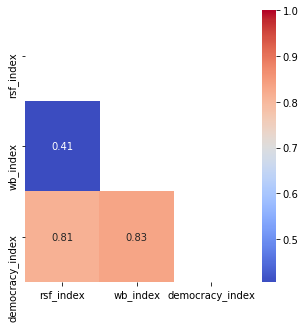

In [103]:
# there is still significant variance associated with democracy_index, though it has shrinked which I assume is due to a
# preexisting correlation between rsf_index and wb_index. but what about covariance? let's look it over graphically
 
heat_plot_var(df_democracy)

In [104]:
# that looks all right to me, insofar as democracy_index was calculated on the basis of the other two. we are now
# ready to move on to prosperity
# as you can see in my report file, I have decided to use the world happiness ranking alone

url='C://Users//Leandro//Downloads//democracy_and_prosperity-master//democracy_and_prosperity-master//datasets//B.I_gwp_raw_dataset.csv'

df_gwp=pd.read_csv(url)

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_gwp)

,country_name,gwp_index
0,1. Finland (7.769),NaN
1,2. Denmark (7.600),NaN
2,3. Norway (7.554),NaN
3,4. Iceland (7.494),NaN
4,5. Netherlands (7.488),NaN
5,6. Switzerland (7.480),NaN
6,7. Sweden (7.343),NaN
7,8. New Zealand (7.307),NaN
8,9. Canada (7.278),NaN
9,10. Austria (7.246),NaN


In [105]:
# now, I have to sort this mess out thereby getting a clean dataframe
# using regular expressions is best

clean_cn=df_gwp['country_name'].str.extract(r'([^0-9\.()]+)')
clean_ind=df_gwp['country_name'].str.extract(r'(\d.\d\d\d)')

df_gwp['country_name']=clean_cn
df_gwp['gwp_index']=clean_ind

df_gwp['gwp_index']=pd.to_numeric(df_gwp['gwp_index'])

# I need to set country names to lower case, and also scale gwp_index

df_gwp['country_name']=df_gwp['country_name'].str.lower()

df_gwp[['gwp_index']]=mms.fit_transform(df_gwp[['gwp_index']])
    
df_gwp.sort_values('country_name',inplace=True)

df_gwp=df_gwp.reset_index(drop=True)

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_gwp)

,country_name,gwp_index
0,afghanistan,5.355980
1,albania,6.897884
2,algeria,7.398291
3,argentina,8.288242
4,armenia,6.735151
5,australia,9.449756
6,austria,9.468063
7,azerbaijan,7.395240
8,bahrain,8.403173
9,bangladesh,6.630391


In [106]:
# there you go. it's now time to merge the df_democracy and df_gwp dataframes into a df_dem_prosp consolidated dataframe

df_democracy['country_name']=df_democracy['country_name'].str.strip()

df_gwp['country_name']=df_gwp['country_name'].str.strip()

df_dem_prosp=pd.merge(df_democracy,df_gwp,how='outer',on='country_name',sort=True)
df_dem_prosp=df_dem_prosp[['country_name','region','democracy_index','gwp_index']]
df_dem_prosp=df_dem_prosp.rename(columns={'gwp_index':'prosperity_index'})

with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_dem_prosp)

,country_name,region,democracy_index,prosperity_index
0,afghanistan,asia_pacific,6.552588,5.355980
1,albania,europe,7.333146,6.897884
2,algeria,middle_east,6.467958,7.398291
3,andorra,europe,7.665437,NaN
4,angola,africa,6.447217,NaN
5,antigua and barbuda,latam_carib,7.175544,NaN
6,argentina,latam_carib,7.104147,8.288242
7,armenia,east_asia,7.495608,6.735151
8,australia,asia_pacific,8.306749,9.449756
9,austria,europe,8.395896,9.468063


In [107]:
# last missing values to impute

africa_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='africa'])
asia_pacific_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='asia_pacific'])
east_asia_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='east_asia'])
europe_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='europe'])
latam_carib_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='latam_carib'])
north_am_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='north_am'])
middle_east_average=np.mean(df_dem_prosp['prosperity_index'][df_dem_prosp['region']=='middle_east'])

for i in range(196):
    if (df_dem_prosp['region'][i]=='africa' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=africa_average
    if (df_dem_prosp['region'][i]=='asia_pacific' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=asia_pacific_average
    if (df_dem_prosp['region'][i]=='east_asia' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=east_asia_average
    if (df_dem_prosp['region'][i]=='europe' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=europe_average
    if (df_dem_prosp['region'][i]=='latam_carib' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=latam_carib_average
    if (df_dem_prosp['region'][i]=='north_am' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=north_am_average
    if (df_dem_prosp['region'][i]=='middle_east' and np.isnan(df_dem_prosp['prosperity_index'][i])==True):
        df_dem_prosp['prosperity_index'][i]=middle_east_average
        
with pd.option_context('display.max_rows',None,'display.max_columns',None):
    display(df_dem_prosp)

,country_name,region,democracy_index,prosperity_index
0,afghanistan,asia_pacific,6.552588,5.355980
1,albania,europe,7.333146,6.897884
2,algeria,middle_east,6.467958,7.398291
3,andorra,europe,7.665437,8.572652
4,angola,africa,6.447217,6.471776
5,antigua and barbuda,latam_carib,7.175544,8.154423
6,argentina,latam_carib,7.104147,8.288242
7,armenia,east_asia,7.495608,6.735151
8,australia,asia_pacific,8.306749,9.449756
9,austria,europe,8.395896,9.468063


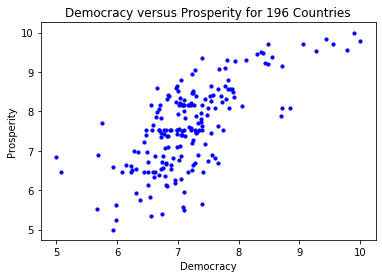

In [108]:
# let's take a look now at what we've got. this is our final dataset as plotted on a scatter chart

def scat_plot(df):
    plt.scatter(df[:,0],df[:,1],c='b',s=10)
    plt.title('Democracy versus Prosperity for 196 Countries')
    plt.xlabel('Democracy')
    plt.ylabel('Prosperity')
    plt.show()
    
X=df_dem_prosp.as_matrix(columns=df_dem_prosp.columns[2:])
labels_true=df_dem_prosp['country_name']

scat_plot(X)

Converged after 41 iterations.
Estimated number of clusters: 8
Silhouette Score: 0.569


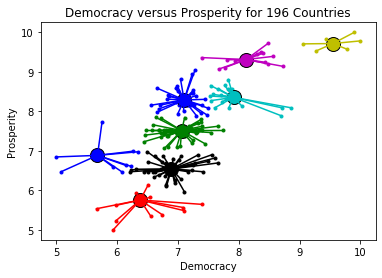

In [109]:
# please refer to my study's report in order to understand why I chose affinity propagation and learn more about how it works.
# the use of a machine learning algorithm involves trade-offs. in this case, a number of clusters which is either too
# narrow or too large has poor explanatory value. explaining the relationship between countries requires assigning 
# meaningful characteristics to country clusters, but one can only do that if those clusters appear to make 
# sense when visualised. you can toy with the algorithm's parameters yourself and come to your own conclusions. when I took
# my turn I kept in mind that I needed to keep the silhouette score at an acceptable level (which I 
# made sure I did by gauging the damping and preference parameters)

# the snippet below was adapted from:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_affinity_propagation.html#sphx-glr-auto-examples-cluster-plot-
# affinity-propagation-py

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# #############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(damping=.8,preference=-5,verbose=True).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Score: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

# #############################################################################
# Plot result
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Democracy versus Prosperity for 196 Countries')
plt.xlabel('Democracy')
plt.ylabel('Prosperity')
plt.show()

Distortion:
1 : 1.0794993467932432
2 : 0.7632568279836032
3 : 0.6019429476038937
4 : 0.5097509484793962
5 : 0.4660226880653918
6 : 0.4226949597002872
7 : 0.3880803632686878
8 : 0.35803261684483995
9 : 0.3307648335240333


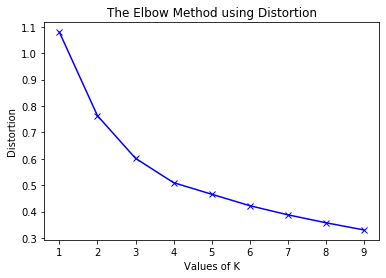

Inertia:
1 : 335.3718531570757
2 : 154.91606579114574
3 : 92.30143282477638
4 : 68.28176798147378
5 : 58.33158413770731
6 : 48.61387647097769
7 : 40.11123076212559
8 : 33.32149403591467
9 : 29.48754395293844


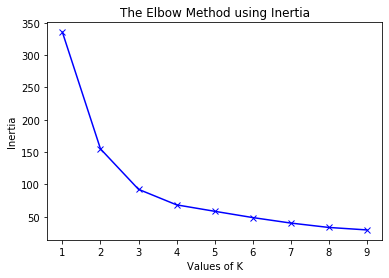

In [110]:
# for the sake of sound methodology, I will now perform a simple demonstration of how both k-means and dbscan performed 
# poorly on this dataset

# the snippet below was adapted from:
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def elbow(X):
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(1,10)    
    for k in K:
        #Building and fitting the model 
        kmeanModel = KMeans(n_clusters=k).fit(X) 
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0]) 
        inertias.append(kmeanModel.inertia_)
        mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0] 
        mapping2[k] = kmeanModel.inertia_ 

    # Using the different values of Distortion
    print('Distortion:')
    for key,val in mapping1.items():
        print(str(key)+' : '+str(val))

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show() 

    # Using the different values of Inertia
    print('Inertia:')
    for key,val in mapping2.items():
        print(str(key)+' : '+str(val))

    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia')
    plt.show()
    
elbow(X)

In [111]:
# both above elbow graphs point to 4 as the optimal number of clusters. let's see how the silhouette score turns out  
# for both 4 and 8 clusters

range_n_clusters=[4,8]

for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters=n_cluster)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    print (n_cluster, metrics.silhouette_score(X,labels))

4 0.39425142057861423
8 0.4066741065787797


Estimated number of clusters: 1
Estimated number of noise points: 54
Silhouette Coefficient: 0.310


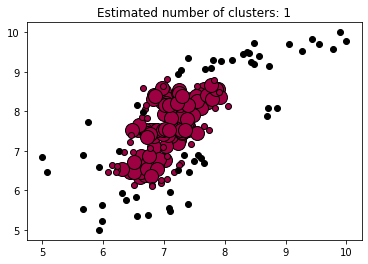

In [112]:
# now dbscan

from sklearn.cluster import DBSCAN

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [113]:
# as you can see these algorithms did not yield a convenient partition of the dataset

# we are now ready to export the final data for further analysis. but first we need to create a new column in the 
# dataframe to accomodate the cluster number information for each country

df_dem_prosp['cluster_#']=AffinityPropagation(damping=.8,preference=-5).fit_predict(X)

df_dem_prosp.to_csv('C:/foo/bar/export_dem_prosp.csv',index=False)

print('Done.')

Done.
